In [36]:
import os 
import pandas as pd 
os.chdir("/home/lowie/data/")
covid = pd.read_csv("combined_train_val.csv",keep_default_na = False)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [38]:
def get_jaccard_sim(str1, str2):
   a = set(str1.split())
   b = set(str2.split())
   c = a.intersection(b)
   return float(len(c)) / (len(a) + len(b) - len(c))

In [39]:
def calc_avg_sim(data): 
    total = 0 
    teller = 0
    for i in range(len(data['text'])): 
        if i%100 == 0: 
            print(i)
        for j in range(i+1,len(data['text'])):
            total = total + get_jaccard_sim(data.iloc[i,0],data.iloc[j,0])
            teller = teller + 1 

    avg_sim = total/teller

    return avg_sim

In [40]:
def cluster_text(text):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(text)

    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
       km = KMeans(n_clusters=k, max_iter=200, n_init=10)
       km = km.fit(X)
       Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return clusters

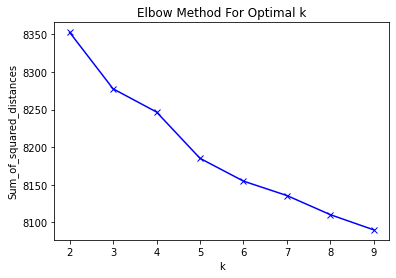

How many clusters do you want to use?


 5


                                                  title  cluster
0     cdc currently reports deaths general discrepan...        0
1     states reported deaths small rise last tuesday...        0
2     politically correct woman almost uses pandemic...        0
4     populous states generate large case counts loo...        0
5     covid act found average person illinois covid ...        0
6     tested positive symptoms stay home away people...        0
8     clearly obama administration leave kind game p...        0
9     retractionhydroxychloroquine chloroquine witho...        0
14    protect others using public transportation pra...        0
16    donald trump s negligence incompetence people ...        0
19    multiple facebook posts claim aussie fined fou...        0
21    nz covid tracker app remain important useful a...        0
22    breaking news president drill ramaphosa asked ...        0
23    delighted high upper middle countries economie...        0
24    intriguing possibil

In [48]:
txt = covid['tweet']
txt_list = list(txt)
clusters = cluster_text(txt_list)

In [49]:
clusters = clusters.rename(columns={"title": "text"})
clusters.head(n=3)

,text,cluster
0,cdc currently reports deaths general discrepan...,0
1,states reported deaths small rise last tuesday...,0
2,politically correct woman almost uses pandemic...,0


In [45]:
df0 = clusters.loc[clusters['cluster'] == 0]
df1 = clusters.loc[clusters['cluster'] == 1]
df2 = clusters.loc[clusters['cluster'] == 2]
df3 = clusters.loc[clusters['cluster'] == 3]
df4 = clusters.loc[clusters['cluster'] == 4]

In [58]:
print(len(df0),len(df1),len(df2),len(df3),len(df4))

4818 769 1362 459 382


In [50]:
total = (calc_avg_sim(df0)+calc_avg_sim(df1)+calc_avg_sim(df2)+calc_avg_sim(df3)+calc_avg_sim(df4))/5


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
0
100
200
300
400
500
600
700
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
0
100
200
300
400
0
100
200
300


In [51]:
total

0.07629422685279476

In [34]:
print(len(df0))
print(len(df1))
print(len(df2))
print(len(df3))

259
7340
167
792


In [35]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

**Let's visualize this**

In [74]:
covid_vis = df1.sample(n=20)

In [63]:
covid_vis.head()

,text,cluster
4912,invading eucalyptus prevents eliminates new co...,2
4020,burger king offer free designer coronavirus ma...,2
1091,yes doctors confirm catch coronavirus arts,2
3405,admin chief asaduddin waist said theres nothin...,2
4273,new dont trust social media post compares dail...,2


In [75]:
a = covid_vis.iloc[0,0]
b = covid_vis.iloc[1,0]
c = covid_vis.iloc[2,0]
d = covid_vis.iloc[3,0]
e = covid_vis.iloc[4,0]
f = covid_vis.iloc[5,0]
g = covid_vis.iloc[6,0]
h = covid_vis.iloc[7,0]
i = covid_vis.iloc[8,0]
j = covid_vis.iloc[9,0]
k = covid_vis.iloc[10,0]
l = covid_vis.iloc[11,0]
m = covid_vis.iloc[12,0]
n = covid_vis.iloc[13,0]
o = covid_vis.iloc[14,0]
p = covid_vis.iloc[15,0]
q = covid_vis.iloc[16,0]
r = covid_vis.iloc[17,0]
s = covid_vis.iloc[18,0]
t = covid_vis.iloc[19,0]

headlines = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t]

In [71]:
headlines

['people living quarantine centre refuse eat food cooked lower caste women',
 'big promises industry come received part note',
 'photo shows coronavirus victims lying streets china',
 'god quarantined due coronavirus season shown viral photo',
 'cdc says despite rumors times safe coronavirus behind invisible glass',
 'india tracker september confirmed cases recovered active cases deaths via',
 'india tracker august confirmed cases recovered active cases deaths via',
 'italy children died covid',
 'labour s asks problems testing adding pretending n t problem part problem pm says testing record high uk testing people european country',
 'cases zero survey status india one lowest cases per million population india compared usa brazil russian federation south africa details',
 're debunking misinformation coronavirus hoaxes travel fast numbers causes growing outbreak need clarification',
 'emissions china italy plunge coronavirus outbreak satellite images reveal',
 'vitamin ds role unclear

In [76]:
import seaborn as sns
labels = [headline[:20] for headline in headlines]
 
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

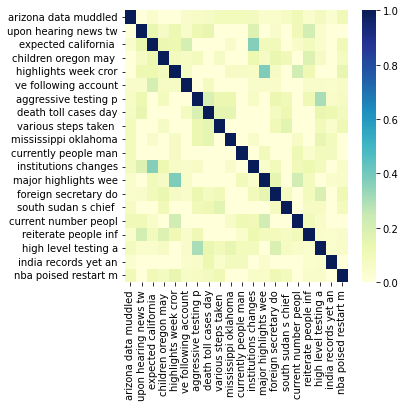

In [77]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(headlines)
arr = X.toarray()

create_heatmap(cosine_similarity(arr))